# **Data Visualization Lab**


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-03-26 07:51:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  26.3MB/s    in 1.3s    

2024-03-26 07:51:45 (26.3 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Visualizing distribution of data


### Histograms


Histogram of `ConvertedComp.`


<AxesSubplot:>

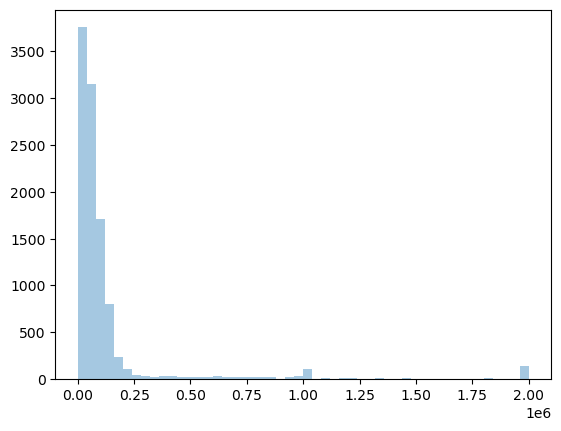

In [4]:
QUERY = """
SELECT ConvertedComp
FROM master

"""
df = pd.read_sql_query(QUERY,conn)

sns.distplot(df,bins=50,kde=False)

### Box Plots


Box plot of `Age.`


<AxesSubplot:>

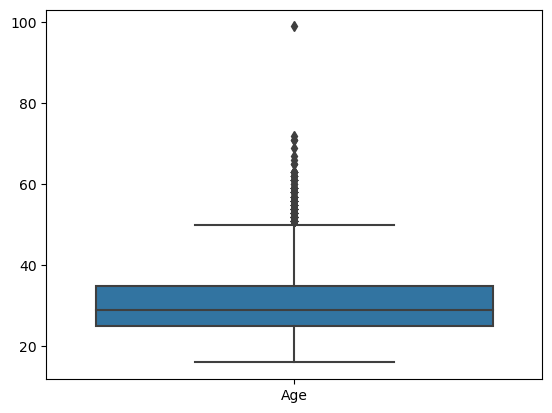

In [5]:
QUERY = """
SELECT Age
FROM master

"""
df = pd.read_sql_query(QUERY,conn)

sns.boxplot(data = df)

## Visualizing relationships in data


### Scatter Plots


Scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

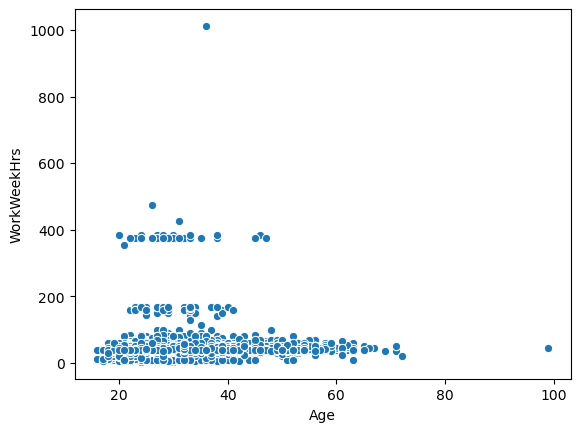

In [6]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

sns.scatterplot(data=df, x='Age', y='WorkWeekHrs')

### Bubble Plots


Bubble plot of `WorkWeekHrs` and `CodeRevHrs`, using `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

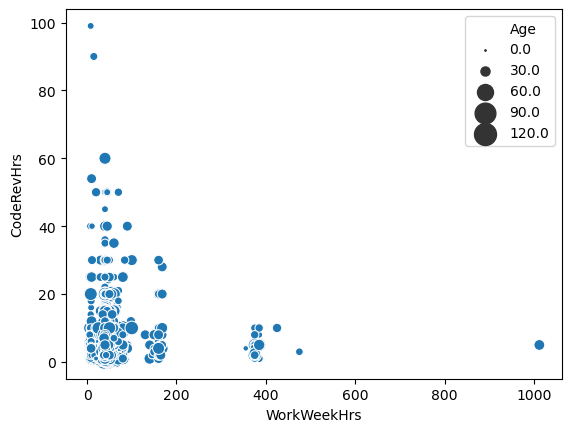

In [7]:
QUERY = """
SELECT Age, WorkWeekHrs,CodeRevHrs 
FROM master
"""
df = pd.read_sql_query(QUERY, conn)


sns.scatterplot(x='WorkWeekHrs', y='CodeRevHrs', size=df['Age'], sizes=(1, 250), data = df)

## Visualizing composition of data


### Pie Charts


Pie chart of the top 5 databases that respondents wish to learn next year.


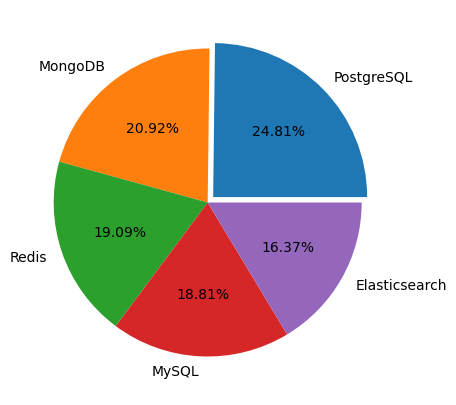

In [8]:
QUERY = """
SELECT *, COUNT(*) AS count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count DESC
LIMIT 5

"""
df = pd.read_sql_query(QUERY,conn)

fig, ax = plt.subplots(figsize=(8,5))
ax.pie(df['count'], labels = df['DatabaseDesireNextYear'], autopct='%1.2f%%', explode = (0.05, 0, 0, 0, 0))
plt.show()

Searching for how many wants to learn Python

   Respondent LanguageDesireNextYear  count
0           4             JavaScript   6630
1           9               HTML/CSS   5328
2          20                 Python   5239
3           4                    SQL   5012
4           9             TypeScript   4088
5           4                     C#   3591
6           9  Bash/Shell/PowerShell   3097
7          17                   Java   2953
8          23                     Go   2759
9          23                 Kotlin   1890


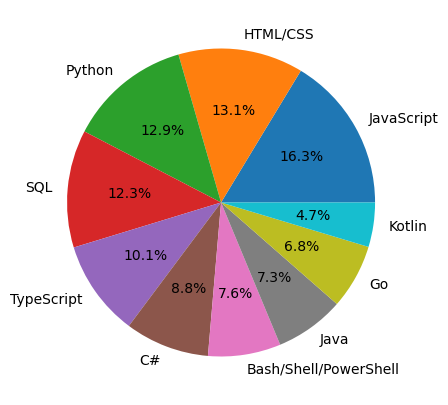

In [9]:
QUERY = """
SELECT *, COUNT(*) AS count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY count DESC
LIMIT 10

"""
df = pd.read_sql_query(QUERY,conn)
print(df)

fig, ax = plt.subplots(figsize=(8,5))
ax.pie(df['count'], labels = df['LanguageDesireNextYear'], autopct='%1.1f%%')
plt.show()

Searching for how many have worked with SQL

   Respondent     LanguageWorkedWith  count
0           9             JavaScript   8687
1           9               HTML/CSS   7830
2           4                    SQL   7106
3           9  Bash/Shell/PowerShell   4642
4           4                 Python   4542
5          19                   Java   4506
6           4                     C#   4288
7           9             TypeScript   3232
8          13                    PHP   2913
9           4                    C++   1946


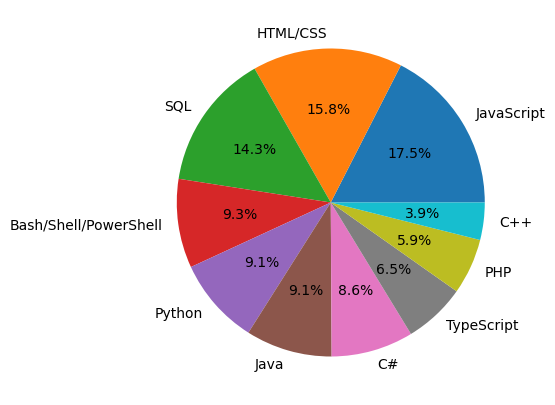

In [10]:
QUERY = """
SELECT *, COUNT(*) AS count
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY count DESC
LIMIT 10

"""
df = pd.read_sql_query(QUERY,conn)

print(df)

fig, ax = plt.subplots(figsize=(8,5))
ax.pie(df['count'], labels = df['LanguageWorkedWith'], autopct='%1.1f%%')
plt.show()

Number of Respondents worked only with MySQL database

In [11]:
QUERY = """
SELECT Respondent
FROM DatabaseWorkedWith
GROUP BY Respondent
HAVING COUNT(DatabaseWorkedWith) = 1  AND DatabaseWorkedWith = 'MySQL';
"""
df = pd.read_sql_query(QUERY,conn)

print(df.count())

Respondent    474
dtype: int64


### Stacked Charts


Stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<Figure size 800x500 with 0 Axes>

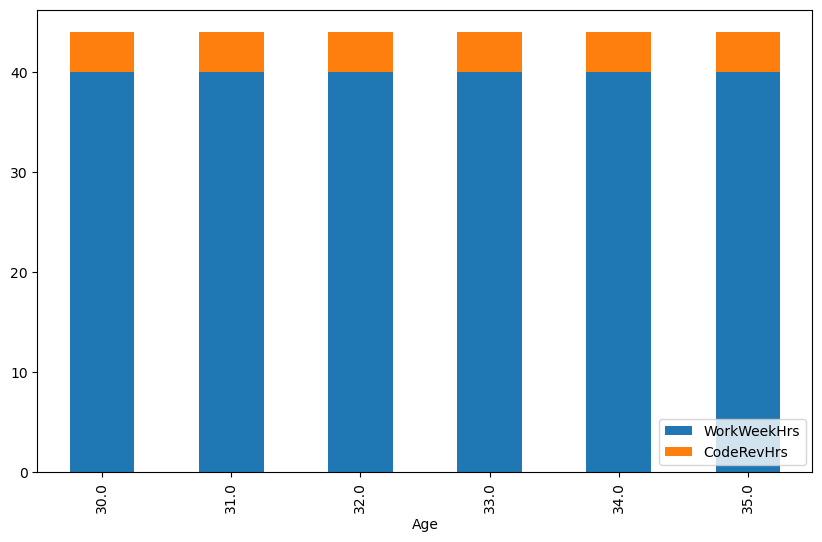

In [12]:
QUERY = """
SELECT Age, WorkWeekHrs,CodeRevHrs, ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

median_data = df[(df['Age'] >= 30) & (df['Age'] <= 35)].groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()

plt.figure(figsize=(8,5))
median_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(loc='lower right')
plt.show()

## Visualizing comparison of data


### Line Chart


For median `ConvertedComp` for all ages from 45 to 60.

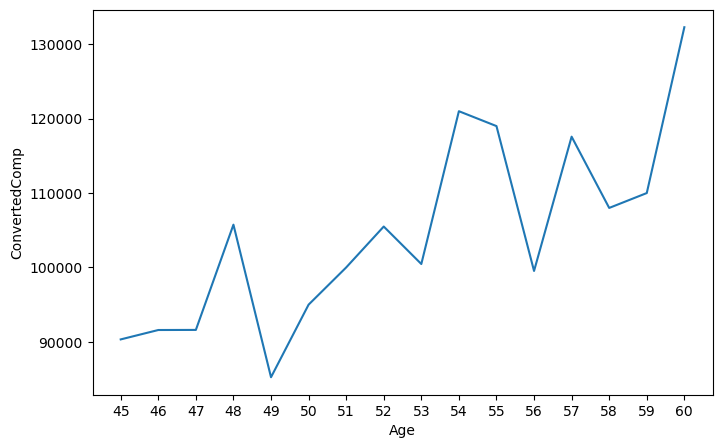

In [13]:
QUERY = """
SELECT Age, ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

median_comp = df[(df['Age'] >= 45) & (df['Age'] <= 60)].groupby('Age')['ConvertedComp'].median()

plt.figure(figsize=(8,5))
plt.plot(median_comp.index, median_comp.values)
plt.xlabel('Age')
plt.ylabel('ConvertedComp')
plt.xticks(range(45, 61))
plt.show()

### Bar Chart


Horizontal bar chart using column `MainBranch.`


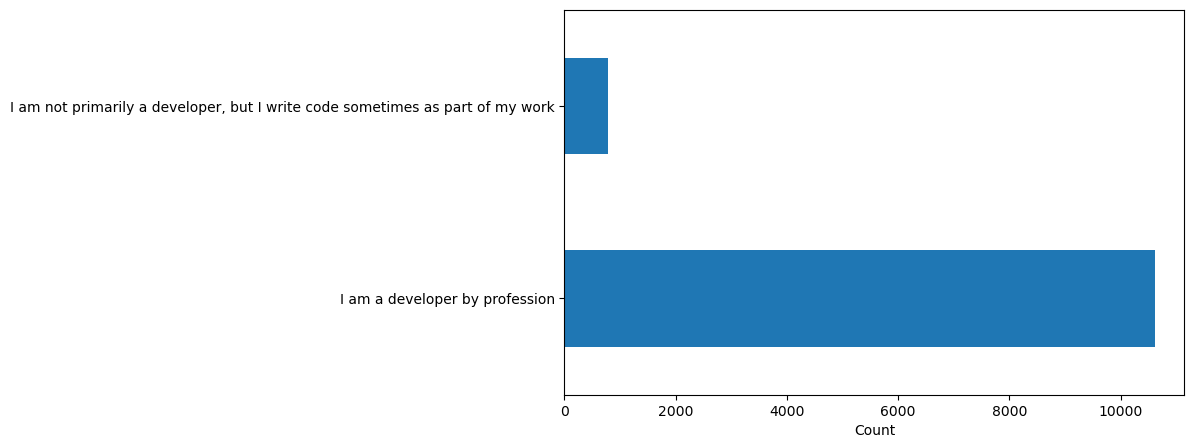

In [14]:
QUERY = """
SELECT MainBranch
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(8,5))  # Adjust the figure size if needed
df['MainBranch'].value_counts().plot(kind='barh')

plt.xlabel('Count')

plt.show()

Close the database connection.


In [15]:
conn.close()